# Анализ клиентов сети фитнес-центров 

Данные - клиентские анкеты. Необходимо построить модель для расчета вероятности оттока для каждого клиента, сформировать портреты клиентов и разделить их на группы, так же проанализировать основные признаки наиболее сильно влияющие на отток.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

## Предобработка данных

In [2]:
try:
    gym_churn = pd.read_csv(--)
except:
    gym_churn = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
gym_churn.duplicated().sum()

0

In [5]:
gym_churn.columns = gym_churn.columns.str.lower()

In [6]:
gym_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Исходя из данных мы можем сказать что мужчин и женщин примерно поровну, большая часть клиентов живет поблизости, в средний абнемент на 4 месяца, менее половины клиентов посещают групповые занятия, а средний возраст 29 лет.

Посмотрим на средние значения признаков для тех кто ушел и остался.

In [7]:
gym_churn.groupby('churn', as_index=False).mean()

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Доли мужчин и женщин в обоих группах одинаковы. Чаще остаются клиенты которые близко проживают, работают в компаниях партнерах, старше, посещают групповые занятия, пришли от дргих клиентов и так же имеют более длительный абонемент и занимаются в зале не первый месяц.

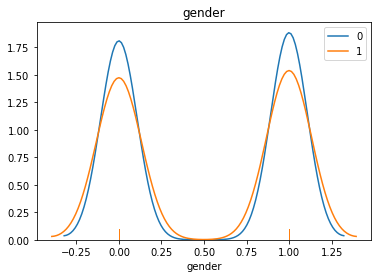

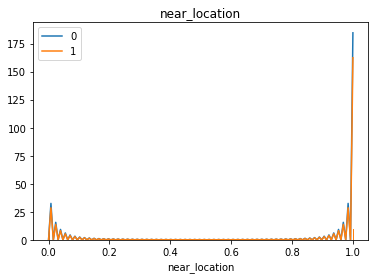

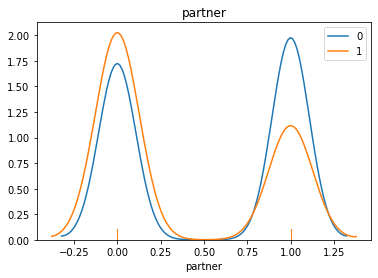

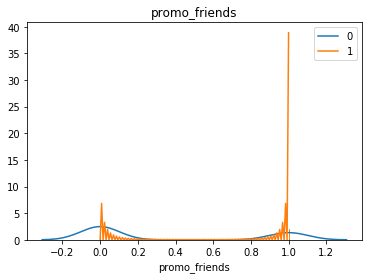

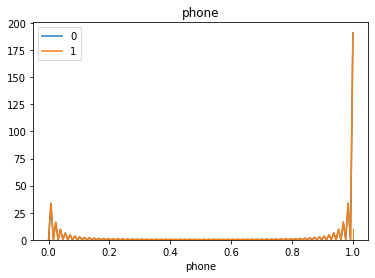

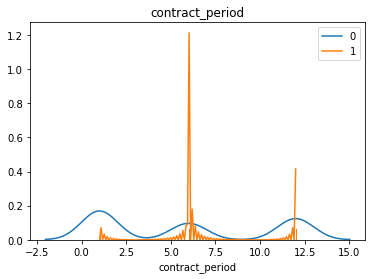

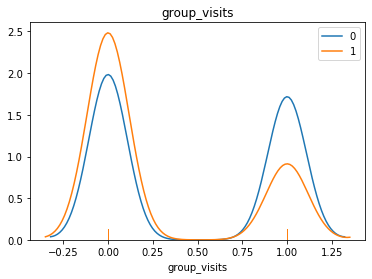

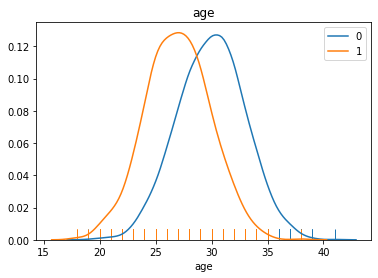

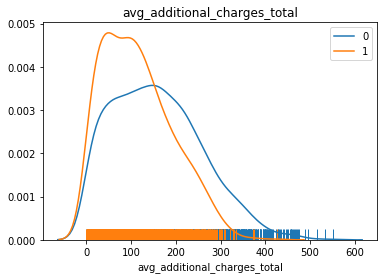

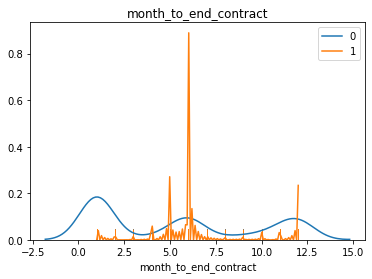

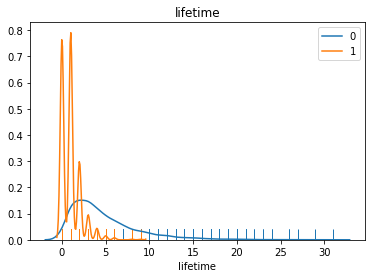

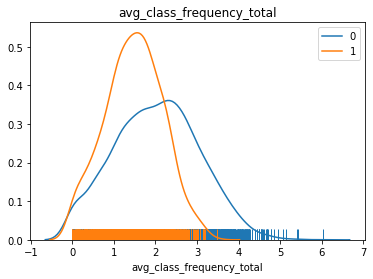

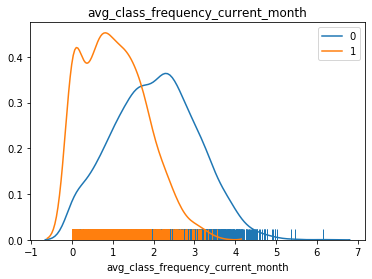

C:\Users\sab\anaconda3\envs\praktikum\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sab\anaconda3\envs\praktikum\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


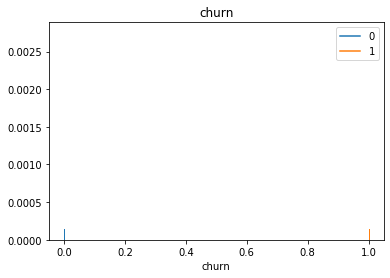

In [8]:
for i in gym_churn.columns:
    sns.distplot(gym_churn[gym_churn['churn'] == 0][i], hist=False, rug=True, label='0')
    sns.distplot(gym_churn[gym_churn['churn'] == 1][i], hist=False, rug=True, label='1')
    plt.legend()
    plt.title(i)
    plt.show()

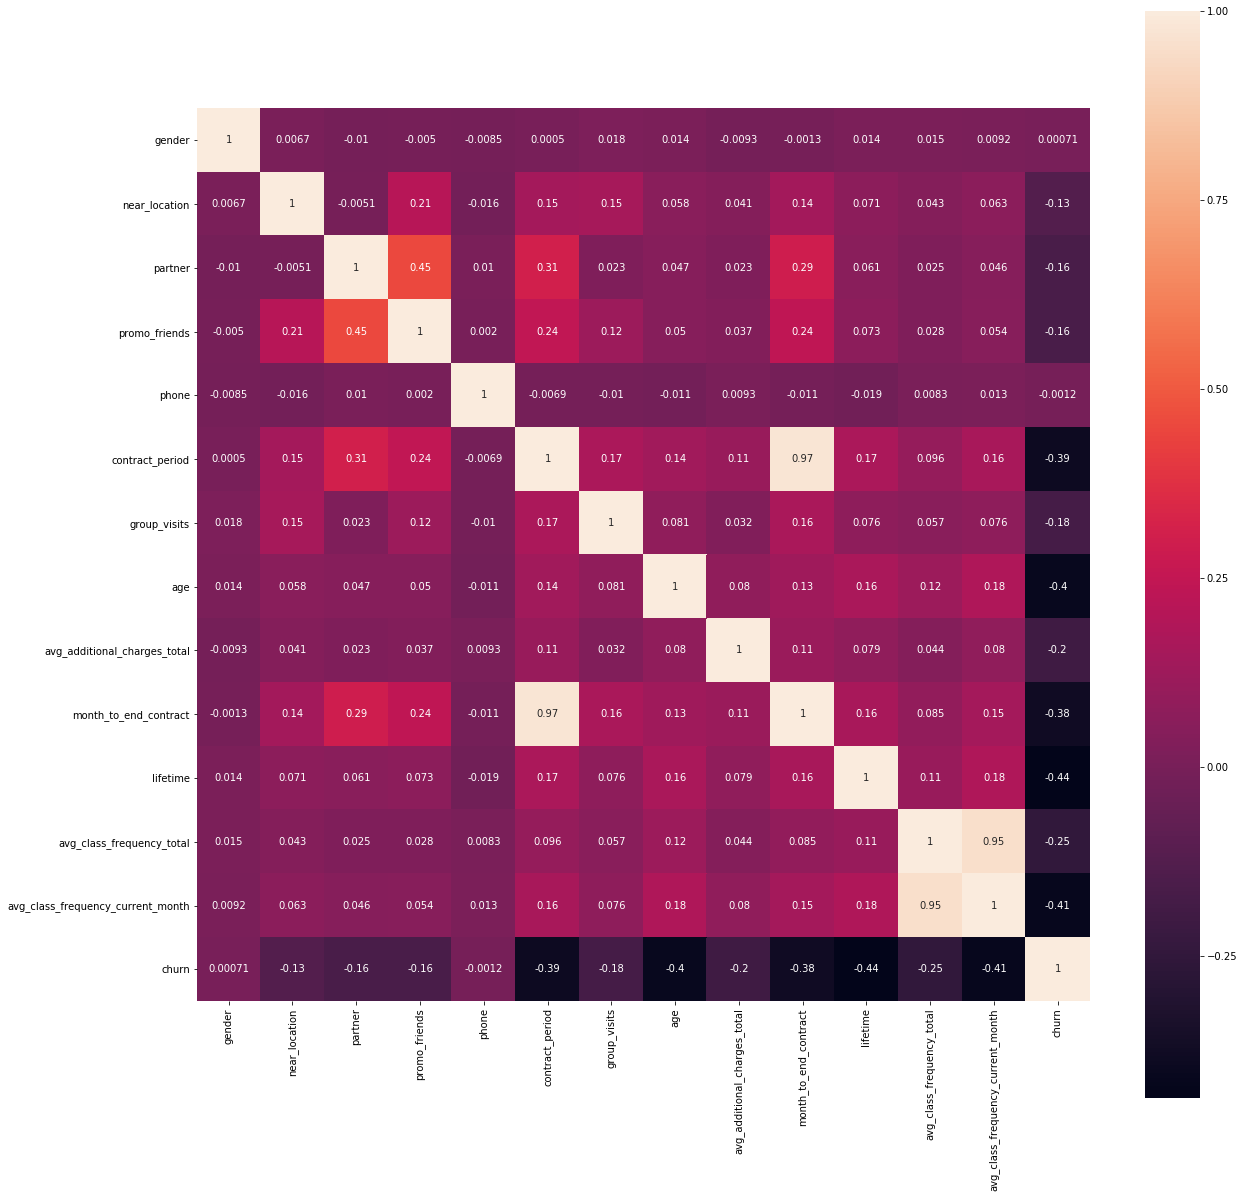

In [9]:
corr = gym_churn.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, square=True)
plt.show()

Как мы видим есть признаки которые сильно коррелируют друг с другом. Действительно сильную корреляцию мы можем наблюдать только  у созависимых признаков, например все признаки связанные с длительностью контрактов(коррелируют между собой) и количеством посещений в неделю. Что касается других признаков то мы можем видеть корреляцию между компаниями партнерами и акцией приведи друга, а так же длительностью контракта. Касательно целевой переменной можно сказать что возможно есть корреляция с возрастом, количеством посещений в неделю и lifetime клиента.

In [10]:
rat = gym_churn.groupby('churn', as_index=False)\
    .agg({'phone': 'count'})\
        .rename(columns={'phone': 'Количество клиентов',
                         'churn': 'Ушло\ Осталось'})
rat['Соотношение'] = rat['Количество клиентов'] / rat['Количество клиентов'].sum()
rat

,Ушло\ Осталось,Количество клиентов,Соотношение
0,0,2939,0.73475
1,1,1061,0.26525


Большая часть клиентов остаётся

## Модель прогнозирования оттока клиентов

In [11]:
x = gym_churn.drop('churn', axis=1)
y = gym_churn['churn']

In [12]:
x_train , x_test, y_train, y_test =\
    train_test_split(x, y, test_size = 0.2, random_state=0)

scaler =StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.fit_transform(x_test)

Построим несколько моделей и сравним их.

In [13]:
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    CatBoostClassifier()
]

In [14]:
def make_predictions(m , x_train, y_train, x_test, y_test):
    model = m
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(
        'accuracy: {:.2f}\
         precision: {:.2f}\
         recall: {:.2f}\
         f1: {:.2f}\n'\
             .format(
                accuracy_score(y_test, y_pred),
                precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                f1_score(y_test, y_pred),
             )
    )


In [15]:
for i in models:
    print(i)
    make_predictions(i, x_train_st, y_train, x_test_st, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
accuracy: 0.89         precision: 0.78         recall: 0.79         f1: 0.78

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
accuracy: 0.91         

C:\Users\sab\anaconda3\envs\praktikum\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy: 0.93         precision: 0.86         recall: 0.84         f1: 0.85

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy: 0.92         precision: 0.82         recall: 0.84         f1: 0.83

Learning rate set to 0.016929


C:\Users\sab\anaconda3\envs\praktikum\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0:	learn: 0.6715564	total: 148ms	remaining: 2m 28s
1:	learn: 0.6505615	total: 153ms	remaining: 1m 16s
2:	learn: 0.6301636	total: 158ms	remaining: 52.5s
3:	learn: 0.6106844	total: 163ms	remaining: 40.6s
4:	learn: 0.5904390	total: 169ms	remaining: 33.7s
5:	learn: 0.5748277	total: 174ms	remaining: 28.7s
6:	learn: 0.5589025	total: 178ms	remaining: 25.2s
7:	learn: 0.5434661	total: 184ms	remaining: 22.8s
8:	learn: 0.5300805	total: 189ms	remaining: 20.8s
9:	learn: 0.5166917	total: 193ms	remaining: 19.1s
10:	learn: 0.5030027	total: 199ms	remaining: 17.9s
11:	learn: 0.4898554	total: 203ms	remaining: 16.7s
12:	learn: 0.4774946	total: 208ms	remaining: 15.8s
13:	learn: 0.4668051	total: 214ms	remaining: 15s
14:	learn: 0.4558769	total: 218ms	remaining: 14.3s
15:	learn: 0.4450554	total: 223ms	remaining: 13.7s
16:	learn: 0.4353152	total: 228ms	remaining: 13.2s
17:	learn: 0.4254869	total: 233ms	remaining: 12.7s
18:	learn: 0.4171653	total: 237ms	remaining: 12.2s
19:	learn: 0.4085537	total: 242ms	remaini

Как мы видим лучшие показатели у GradientBoostingClasssifier и LogisticRegression. F1 score 0.86  и 0.85 соответственно. Так же precision и recall лучше у GradienBoostingClassifier. А accuracy равны, но так как распределение классов у нас не равномерное это не самая показательная метрика.
Однако если рассмотреть CatBoostClassifier то его метрики лучше. Его F1 равен 0.91

In [16]:
CatBoost_model = CatBoostClassifier()
CatBoost_model.fit(x_train, y_train)
y_CatBoost_pred = CatBoost_model.predict(x_test)
y_CatBoost_prob = CatBoost_model.predict_proba(x_test)

Learning rate set to 0.016929
0:	learn: 0.6715564	total: 7.6ms	remaining: 7.59s
1:	learn: 0.6505615	total: 11.2ms	remaining: 5.6s
2:	learn: 0.6301636	total: 15.2ms	remaining: 5.05s
3:	learn: 0.6106844	total: 19.1ms	remaining: 4.75s
4:	learn: 0.5904390	total: 22.9ms	remaining: 4.56s
5:	learn: 0.5748277	total: 26.4ms	remaining: 4.38s
6:	learn: 0.5589025	total: 30.6ms	remaining: 4.34s
7:	learn: 0.5434661	total: 34.2ms	remaining: 4.25s
8:	learn: 0.5300805	total: 38ms	remaining: 4.18s
9:	learn: 0.5166917	total: 41.6ms	remaining: 4.12s
10:	learn: 0.5030027	total: 45.7ms	remaining: 4.11s
11:	learn: 0.4898554	total: 50ms	remaining: 4.12s
12:	learn: 0.4774946	total: 53.5ms	remaining: 4.07s
13:	learn: 0.4668051	total: 57.1ms	remaining: 4.02s
14:	learn: 0.4558769	total: 60.9ms	remaining: 4s
15:	learn: 0.4450554	total: 64.8ms	remaining: 3.99s
16:	learn: 0.4353152	total: 68.3ms	remaining: 3.95s
17:	learn: 0.4254869	total: 72ms	remaining: 3.93s
18:	learn: 0.4171653	total: 75.8ms	remaining: 3.91s
19:

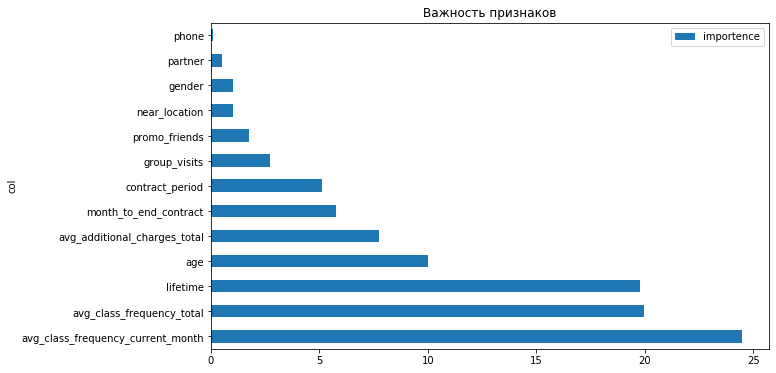

In [17]:
fea_imp = pd.DataFrame({
    'importence': CatBoost_model.get_feature_importance() ,
    'col': CatBoost_model.feature_names_
})
fea_imp = fea_imp.sort_values(['importence', 'col'],ascending=False)
fea_imp.plot(kind='barh', x='col', y='importence', figsize=(10,6))
plt.title('Важность признаков')
plt.show()

Как мы видим ключевыми признаками для модели стали: количество посещений в неделю, lifetime клиента и возраст.

## Кластеризация клиентов

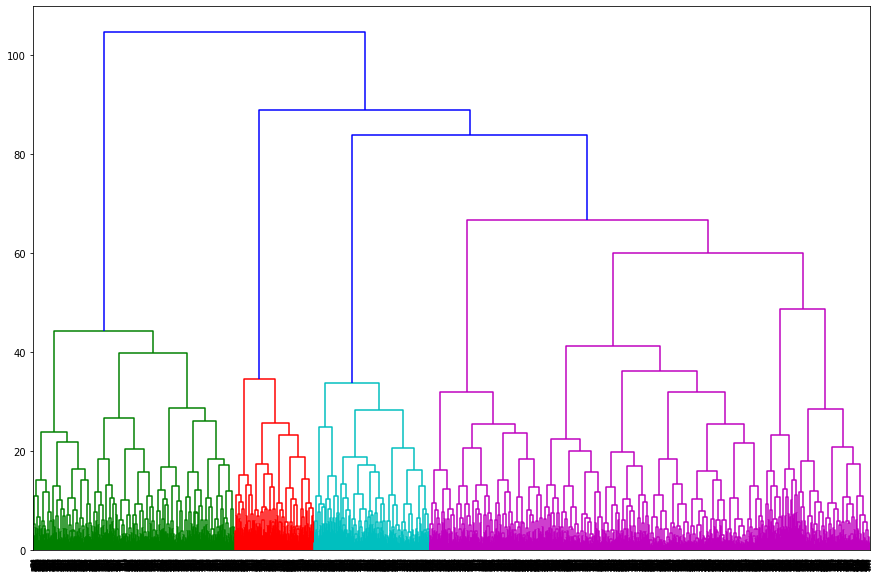

In [18]:
x_sc = scaler.fit_transform(x)
linked = linkage(x_sc, method='ward')

plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.show()

На основе дендрограммы можно предположить что клиентов можно разделить на 4 кластера.

In [19]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(x_sc) 

gym_churn['cluster_km'] = labels

print('silhouette_score: {:.2f}'.format(silhouette_score(x_sc, labels)))

silhouette_score: 0.14


In [20]:
gym_churn.groupby('cluster_km', as_index=False).mean()

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


Больше всего уходят клиенты 2 и 3 кластера, меньше всего 0. При этом в среднем у пользователей 0 кластера самые длительные абонементы, а так же большая часть из них сотрудники компаний партнеров.

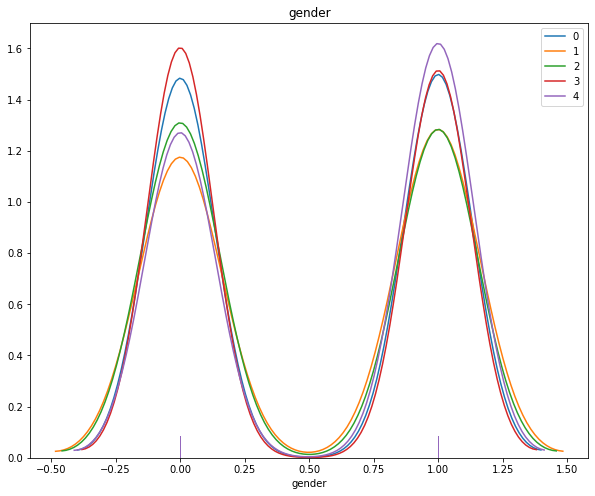

C:\Users\sab\anaconda3\envs\praktikum\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sab\anaconda3\envs\praktikum\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


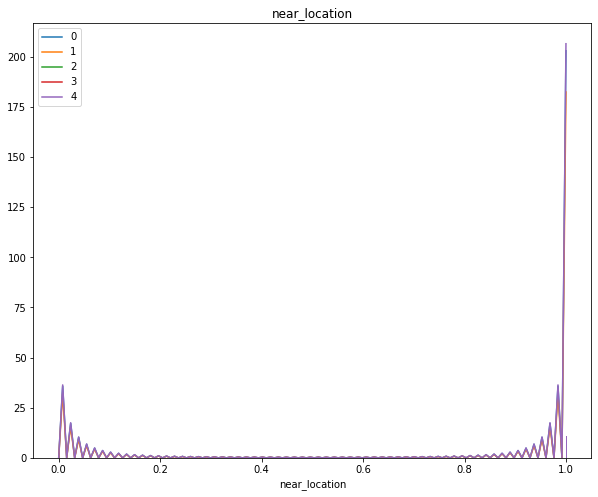

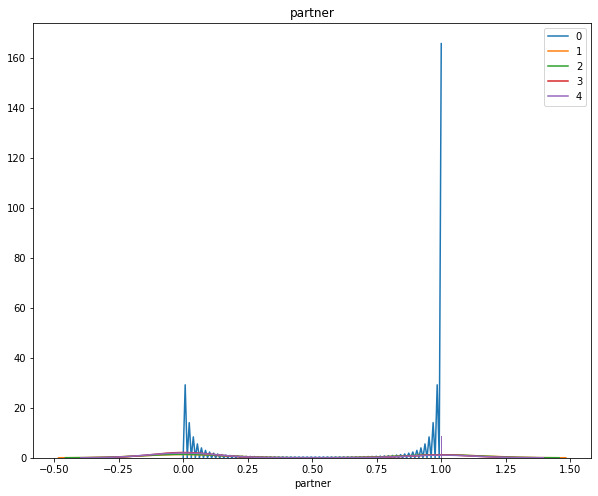

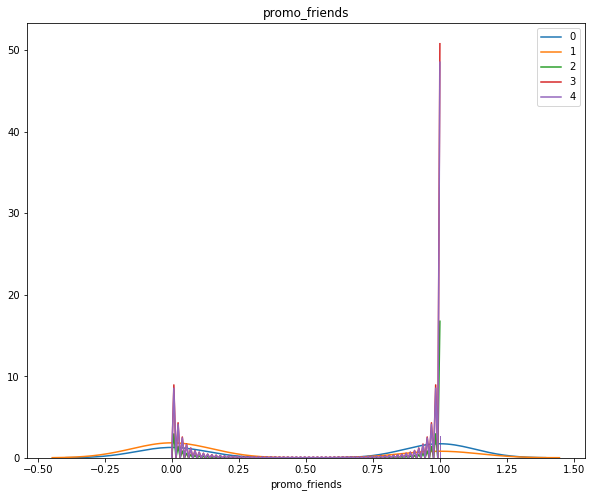

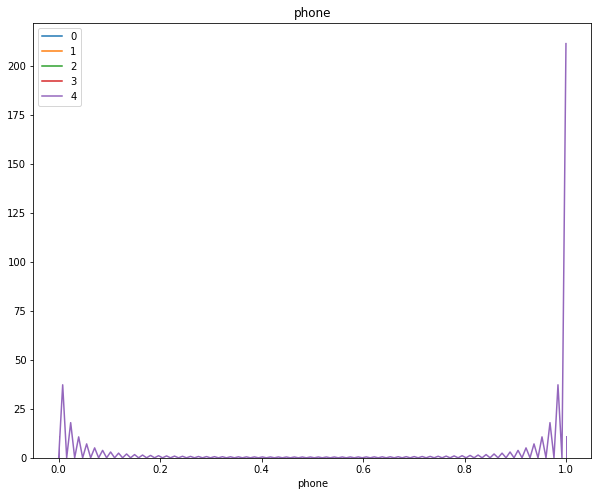

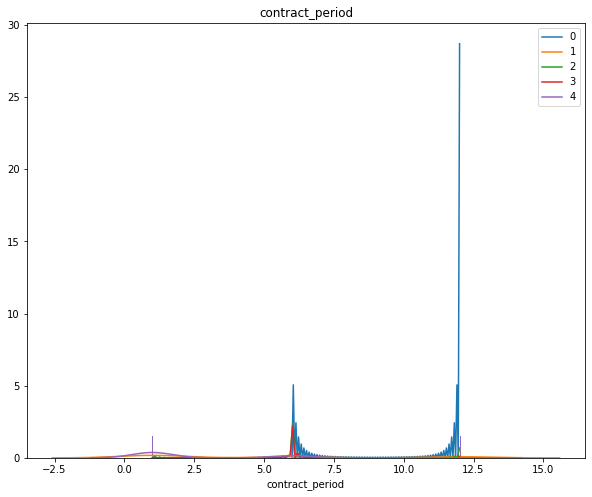

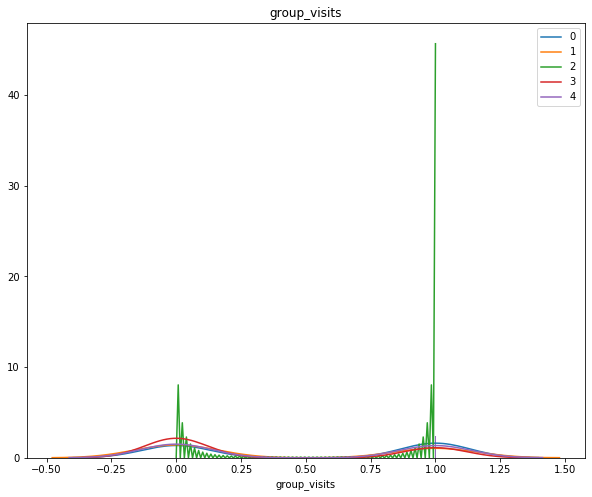

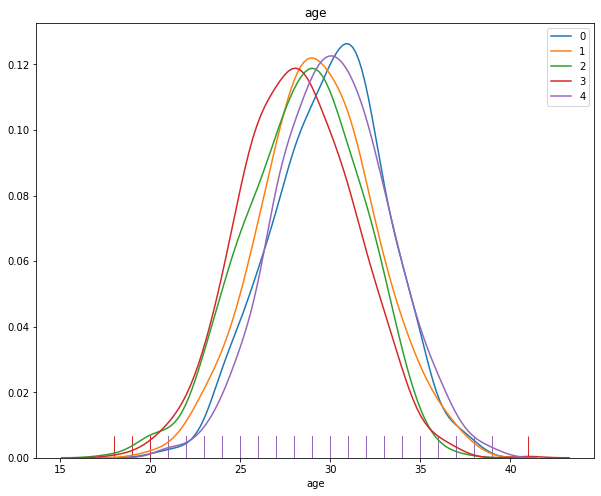

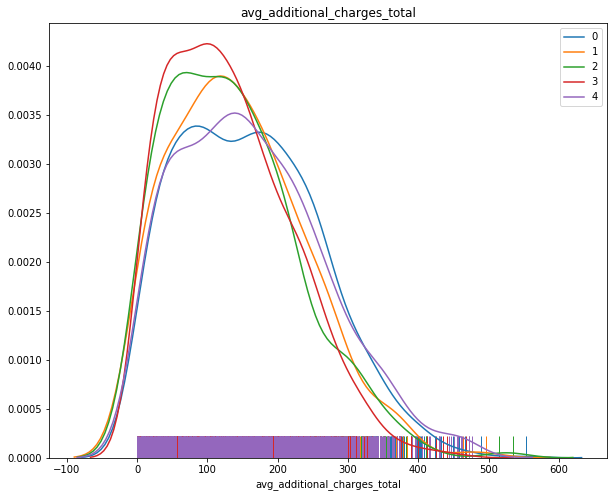

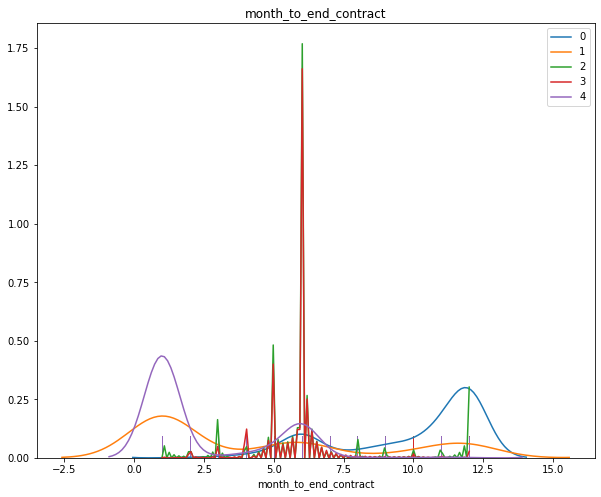

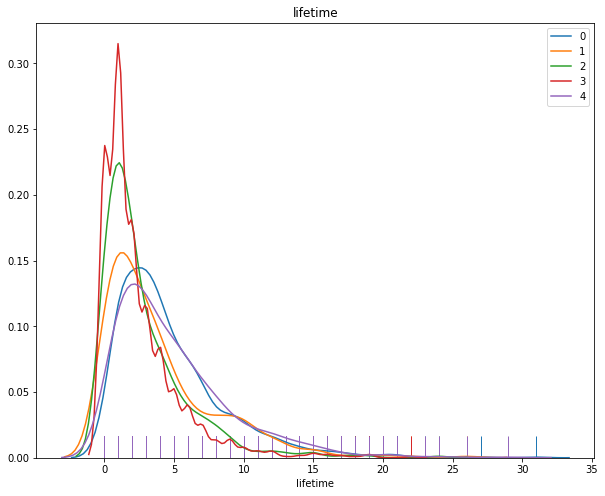

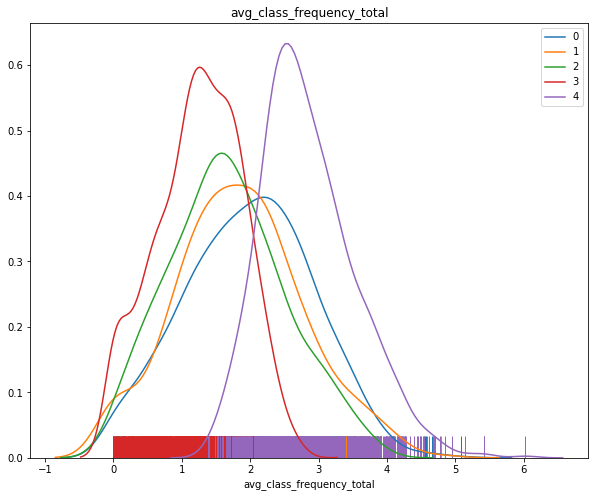

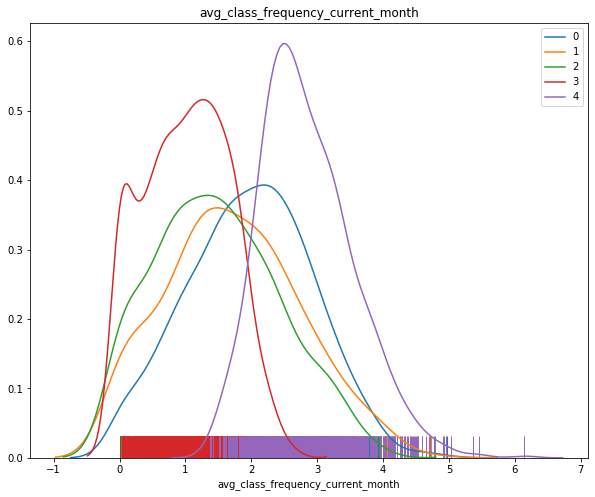

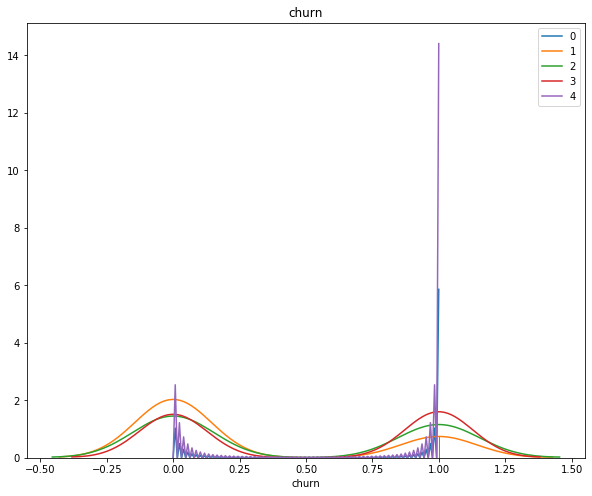

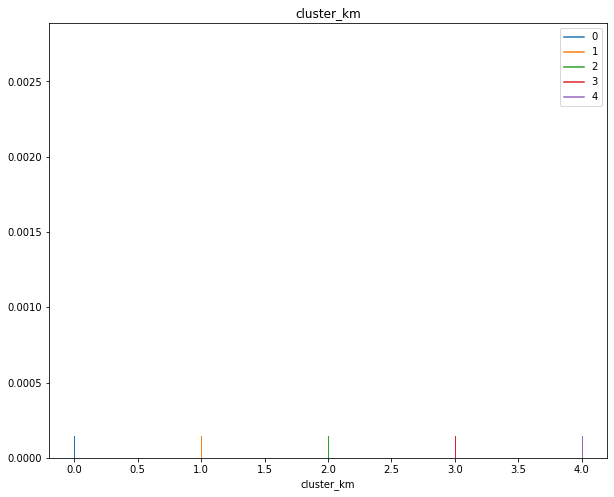

In [21]:
for i in gym_churn.columns:
    plt.figure(figsize=(10,8))
    sns.distplot(gym_churn[gym_churn['cluster_km'] == 0][i], hist=False, rug=True, label='0')
    sns.distplot(gym_churn[gym_churn['cluster_km'] == 1][i], hist=False, rug=True, label='1')
    sns.distplot(gym_churn[gym_churn['cluster_km'] == 2][i], hist=False, rug=True, label='2')
    sns.distplot(gym_churn[gym_churn['cluster_km'] == 3][i], hist=False, rug=True, label='3')
    sns.distplot(gym_churn[gym_churn['cluster_km'] == 4][i], hist=False, rug=True, label='4')
    plt.title(i)
    plt.legend()
    plt.show()

На данных графиках мы видим что некоторые признаки не сильно отличаются вне зависимости от кластера, такие как юлизость к дому, наличие номера телефона. Некоторые наоборот, такие как количество посещений в неделю, lifetime, количество месяцев до конца абонемента, выручка, посещение групповых занятий ,длительность абонемента, и проход по акции.

In [22]:
rat_cluster = gym_churn.groupby(['churn', 'cluster_km'], as_index=False)\
    .agg({'phone': 'count'})\
        .rename(columns={'phone': 'Количество клиентов',
                         'churn': 'Ушло\Осталось'})
for i in rat_cluster['cluster_km'].unique():    
    rat_cluster.loc[rat_cluster['cluster_km'] == i, 'Соотношение'] = (rat_cluster.loc[rat_cluster['cluster_km'] == i, 'Количество клиентов'] /\
         rat_cluster.loc[rat_cluster['cluster_km'] == i, 'Количество клиентов'].sum()).round(2)
rat_cluster_zero = rat_cluster[rat_cluster['Ушло\Осталось'] == 0][['cluster_km', 'Количество клиентов', 'Соотношение']]
rat_cluster_one = rat_cluster[rat_cluster['Ушло\Осталось'] == 1][['cluster_km', 'Количество клиентов', 'Соотношение']]

In [23]:
print('Данная таблица отражает соотношение тех что ушли к оставшимся')
rat_cluster_one.sort_values('Соотношение', ascending=False)

Данная таблица отражает соотношение тех что ушли к оставшимся


,cluster_km,Количество клиентов,Соотношение
8,3,649,0.51
7,2,224,0.44
6,1,103,0.27
9,4,57,0.07
5,0,28,0.03


In [24]:
print('Это соотношение оставшихся к тем что ушли')
rat_cluster_zero.sort_values('Соотношение', ascending=False)

Это соотношение оставшихся к тем что ушли


,cluster_km,Количество клиентов,Соотношение
0,0,983,0.97
4,4,780,0.93
1,1,282,0.73
2,2,281,0.56
3,3,613,0.49


Больше всего клиентов остается из кластеров 0 и 4 у них лучшее соттношение 0.97 и 0.93. Это самые лояльные клиенты. Маркетологам следует изучить более подробно данных клиентов, их привычки и выяснить что именно делает привлекательными для них данные фитнес-центры. Наииенее лояльные клиенты находятся в кластерах 3 и 2. Касательно клиентов второго кластера, данные клиенты живут далеко и не всем под силу длительное время ездить в зал только для тренировок, возможно им стоит предложить другие более расслабляющие процедуры. Тем самым увеличив выручку с дополнительных услуг, так как данный признак является одним из наиболее коррелирующих с удержанием клиента.

## Вывод

Большинство клиентов от 25 до 33 лет. Средний lifetime клиента 3 месяца. В среднем клиенты посещают зал 2 раза. Наибольшая корреляция с лоялбностью клиента наблюдается с количеством посещений в неделю, времением сотрудничества с клиентом, возрастом и выручкой от  дополнительных услуг.<br>
Наиболее подходящей моделью является CatBoostClassifier она показала наилучшие результаты по метрикам.<br>
При этом при разделении клиентов на кластеры самыми лояльными являются 0 и 4. Клиенты этих кластеров проживают близко к фитнес-центрам и ходят по 2,3 раза в неделю соответственно. Клиенты 0 кластера в большенстве своем сотрудники компаний партнеров. Так же данные кластеры облада несут больше всего выручки за дополнительные услуги и имеют больший lifetime. <br>
Следует ввести гибкую систему скидок для клиентов с целью стимулирования более частого посещения фитнес-центров. Сделать более привелкательными цены на длительные абонементы. А так же продвигать дополнительные услуги.